In the digital era, music streaming has become the major way people consume music content. Music streaming platforms such as Spotify and Apple Music have become a marketplace where "sellers" (artists) compete for buyers (listeners) and establish their "brands" (fanbase). Having hit songs on those platforms has become one of the key indicators of an artist's business success and precursors for revenue generation. As the market is becoming increasingly competitive with established singers dominating the chart and with new artists actively trying to flourish by releasing digital singles, an artist and their company need to be strategic as they push their way to the front of the crowd. Singers wouldn't want to crash their release of a single with a similar singer; moderate stars wouldn't want to crash their release with a huge star, which might "steal their thunder". This project helps music companies and artists do strategic planning in releasing their music on streaming platforms. Using the public dataset from Spotify (149 weeks, Top 200 chart each week), I plan to use machine learning tools to forecast **"dangerous" periods**, and **"safe periods"** for a singer to release singles. Forecasting those periods accurately could help singers thrive (well, of course, under the condition that the songs are indeed good.) My first plot shows that timing could play a central role in determining a song's ranking. The plot shows that the average, normal rate of dropping out of the chart is ~10%, there are certain points of time when 20-30% of songs on the TOP 200 chart fall out of the chart in one single week, which indicates massive releases of "big ones" during that week. The second plot shows a specific subgroup (Top 100) to illustrate that **forecasting "dangerous" and "safe" periods should be catered to different groups**. Given this intro, I aim to work on such a project where we can forecast different artist's safe, and dangerous periods for releasing singles in the future, given his or her group belonging or "tier". 

## Get data.

In [94]:
import csv
import requests
import pandas as pd
import datetime as DT
CSV_URL = 'https://spotifycharts.com/regional/us/weekly/2016-12-23--2016-12-30/download'
df_spo = pd.DataFrame(columns=['Position','Track Name','Artist','Streams','Week'])

for i in range(149):
    
    YEAR = int(CSV_URL[45:49])
    MONTH = int(CSV_URL[50:52])
    DAY = int(CSV_URL[53:55])
    CURRENT_DATE = DT.date(YEAR,MONTH,DAY)
    with requests.Session() as s:
        download = s.get(CSV_URL)
        decoded_content = download.content.decode('utf-8')
        cr = csv.reader(decoded_content.splitlines(), delimiter=',')
        my_list = list(cr)
        columns = my_list[1]
        df=pd.DataFrame(my_list[2:])
        df.columns=columns
        df=df.iloc[:,0:4]
        df['Week'] = i+1
            
    df_spo=df_spo.append(df)
    df_spo = df_spo.reset_index(drop=True)
    NEXT_DATE = CURRENT_DATE+DT.timedelta(days=7)
    YEAR = str(NEXT_DATE.year)
    MONTH = str(NEXT_DATE.month)
    if len(MONTH)==1:
        MONTH ='0'+MONTH
    DAY = str(NEXT_DATE.day)
    if len(DAY)==1:
        DAY ='0'+DAY
    NEXT_DATE2 = NEXT_DATE+DT.timedelta(days=7)
    YEAR2 = str(NEXT_DATE2.year)
    MONTH2 = str(NEXT_DATE2.month)
    if len(MONTH2)==1:
        MONTH2 ='0'+MONTH2
    DAY2 = str(NEXT_DATE2.day)
    if len(DAY2)==1:
        DAY2 ='0'+DAY2
    CSV_URL = 'https://spotifycharts.com/regional/us/weekly/%s-%s-%s--%s-%s-%s/download'%(YEAR,MONTH,DAY,YEAR2,MONTH2,DAY2)
    i=i+1

In [2]:
df_spo.head()

,Position,Track Name,Artist,Streams,Week
0,1,Fake Love,Drake,8618267,1
1,2,Bad and Boujee (feat. Lil Uzi Vert),Migos,7946032,1
2,3,Starboy,The Weeknd,7738517,1
3,4,Black Beatles,Rae Sremmurd,6209336,1
4,5,Closer,The Chainsmokers,5813157,1


## Looks in great form !
## To calculate dropout rate (the proportion of songs that drop out of the chart in the next week), need one hot coding

In [95]:
df_spo['Streams']=df_spo.Streams.astype(int)
weekly_total_counts = df_spo.groupby('Week')['Streams'].sum(axis=0)

In [96]:
df_spo_oc = pd.get_dummies(df_spo['Track Name'])
df_spo_oc['Week'] = df_spo['Week']
Adj_col_names = [df_spo_oc.columns[-1]]+list(df_spo_oc.columns[:-1]) # change the positions of columns
df_spo_oc = df_spo_oc[Adj_col_names]
df_spo_oc.columns = Adj_col_names
df_spo_oc.head()

,Week,,!,#PROUDCATOWNERREMIX,$$$ - with Matt Ox,'Till I Collapse,(Fuck A) Silver Lining,...Ready For It?,1 SIDED LOVE,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",...,what are you so afraid of,when the party's over,when the party's over - Recorded at Spotify Studios NYC,whoa (mind in awe),wish you were gay,wokeuplikethis*,xanny,you should see me in a crown,Échame La Culpa,美女と野獣
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
song_list = df_spo_oc.columns[1:]
print('Wow, there are {} unique songs on the chart.'.format(len(song_list)))
print('In total, there are {} spots on the chart.'.format(df_spo.shape[0]))
print('Therefore, on average, each song lasts {} weeks on the chart'.format(df_spo.shape[0]/len(song_list)))

Wow, there are 2859 unique songs on the chart.
In total, there are 29800 spots on the chart.
Therefore, on average, each song lasts 10.423224903812521 weeks on the chart


## How does the pattern of dropout dynamics look like? 
## To answer this, calculate dropout rates across weeks and plot them over time.

In [98]:
df_spo_oc_ind = df_spo_oc.iloc[:,1:]==1 
df_spo_oc_ind['Week'] = df_spo_oc['Week']
Adj_col_names = [df_spo_oc_ind.columns[-1]]+list(df_spo_oc_ind.columns[:-1]) # change the positions of columns
df_spo_oc_ind = df_spo_oc_ind[Adj_col_names]
df_spo_oc_ind.columns = Adj_col_names
df_spo_ind = df_spo_oc_ind.groupby('Week').sum(axis=0)

(149, 2859)


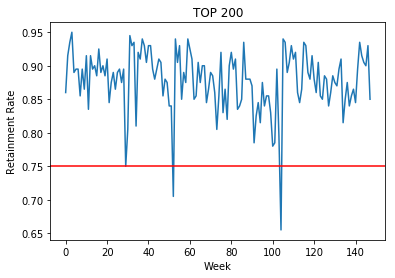

In [99]:
print(df_spo_ind.shape)
Retainment = []
for j in range((df_spo_ind.shape[0]-1)):
    Retainment.append(sum(np.array(df_spo_ind.iloc[j+1,:]) & np.array(df_spo_ind.iloc[j,:]))/sum(np.array(df_spo_ind.iloc[j,:])))
import matplotlib.pyplot as plt
plt.plot(Retainment)
plt.axhline(y=0.75, color='r', linestyle='-')
plt.xlabel('Week')
plt.ylabel('Retainment Rate')
plt.title('TOP 200')
plt.show()  

The plot shows that while the market shows a relatively stable dynamic pattern, where retainment rate lingers around 90%, **there are three significant periods where retainment rate drops to 0.75, 0.70, and even 0.65.** These three periods may involve the release of numerous strong songs, which shakes the market, thus regarded as DANGEROUS periods.

## **Taylor Swift** might not need to worry about the competition from relatively less popular artists, but might worry about **Shawn Mendes**, who could shake the market when he releases new songs.  So forecasting needs to be personalized!

## Next, I check the dynamic pattern of TOP 100, which represent the popular tier (it's not ideal, I do this just for the sake of illustration for the moment). The purpose is to illustrate the need to do PERSONALIZED FORECASTING for different groups singers. 

In [86]:
import csv
import requests
import pandas as pd
import datetime as DT
CSV_URL = 'https://spotifycharts.com/regional/us/weekly/2016-12-23--2016-12-30/download'
df_spo = pd.DataFrame(columns=['Position','Track Name','Artist','Streams','Week'])

for i in range(149):
    
    YEAR = int(CSV_URL[45:49])
    MONTH = int(CSV_URL[50:52])
    DAY = int(CSV_URL[53:55])
    CURRENT_DATE = DT.date(YEAR,MONTH,DAY)
    with requests.Session() as s:
        download = s.get(CSV_URL)
        decoded_content = download.content.decode('utf-8')
        cr = csv.reader(decoded_content.splitlines(), delimiter=',')
        my_list = list(cr)
        columns = my_list[1]
        df=pd.DataFrame(my_list[2:])
        df.columns=columns
        df=df.iloc[:,0:4]
        df=df.iloc[0:100,:]
        df['Week'] = i+1
            
    df_spo=df_spo.append(df)
    df_spo = df_spo.reset_index(drop=True)
    NEXT_DATE = CURRENT_DATE+DT.timedelta(days=7)
    YEAR = str(NEXT_DATE.year)
    MONTH = str(NEXT_DATE.month)
    if len(MONTH)==1:
        MONTH ='0'+MONTH
    DAY = str(NEXT_DATE.day)
    if len(DAY)==1:
        DAY ='0'+DAY
    NEXT_DATE2 = NEXT_DATE+DT.timedelta(days=7)
    YEAR2 = str(NEXT_DATE2.year)
    MONTH2 = str(NEXT_DATE2.month)
    if len(MONTH2)==1:
        MONTH2 ='0'+MONTH2
    DAY2 = str(NEXT_DATE2.day)
    if len(DAY2)==1:
        DAY2 ='0'+DAY2
    CSV_URL = 'https://spotifycharts.com/regional/us/weekly/%s-%s-%s--%s-%s-%s/download'%(YEAR,MONTH,DAY,YEAR2,MONTH2,DAY2)
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [ ]:
df_spo['Streams']=df_spo.Streams.astype(int)
weekly_total_counts = df_spo.groupby('Week')['Streams'].sum(axis=0)
df_spo_oc = pd.get_dummies(df_spo['Track Name'])
df_spo_oc['Week'] = df_spo['Week']
Adj_col_names = [df_spo_oc.columns[-1]]+list(df_spo_oc.columns[:-1]) # change the positions of columns
df_spo_oc = df_spo_oc[Adj_col_names]
df_spo_oc.columns = Adj_col_names

df_spo_oc_ind = df_spo_oc.iloc[:,1:]==1 
df_spo_oc_ind['Week'] = df_spo_oc['Week']
Adj_col_names = [df_spo_oc_ind.columns[-1]]+list(df_spo_oc_ind.columns[:-1]) # change the positions of columns
df_spo_oc_ind = df_spo_oc_ind[Adj_col_names]
df_spo_oc_ind.columns = Adj_col_names
df_spo_ind = df_spo_oc_ind.groupby('Week').sum(axis=0)

print(df_spo_ind.shape)
Retainment = []
for j in range((df_spo_ind.shape[0]-1)):
    Retainment.append(sum(np.array(df_spo_ind.iloc[j+1,:]) & np.array(df_spo_ind.iloc[j,:]))/sum(np.array(df_spo_ind.iloc[j,:])))


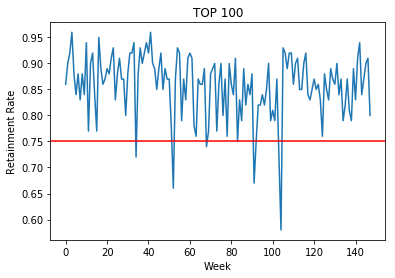

In [93]:
import matplotlib.pyplot as plt
plt.plot(Retainment)
plt.axhline(y=0.75, color='r', linestyle='-')
plt.xlabel('Week')
plt.ylabel('Retainment Rate')
plt.title('TOP 100')
plt.show()  

## The pattern appears different from TOP 200 now! Using TOP 50 to be compared with TOP 200 may not be the ideal way to group singers. We will use other more objective measures to group singers, and use the portion of the chart data belonging to those groups to identify dangerous and safe zones. (For example, "Latin pop" group, "rap" group would need different forecasting)